In [34]:
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
# from sklearn.linear_model import 

In [43]:
# read data
norm_feature_1 = pd.read_csv('D:/Kaggle/feature/norm_feature_1.csv')
feature_train = pd.read_csv('D:/Kaggle/feature_train.csv')

In [ ]:
norm_feature_1

In [46]:
norm_feature_1['stock_id'] = feature_train.copy()['stock_id']

In [ ]:
norm_feature_1

In [49]:
classification = pd.read_csv('D:/Kaggle/model/stock_classification.csv')
check_dict = dict(zip(classification['stock_id'],classification['classification']))
norm_feature_1['classification'] = norm_feature_1['stock_id'].map(check_dict)
norm_feature_1 = norm_feature_1.drop(['stock_id'],1)

0 finish selector


C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


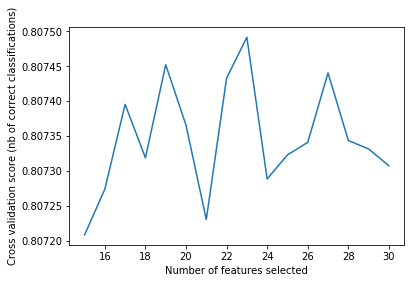

1 finish selector


C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


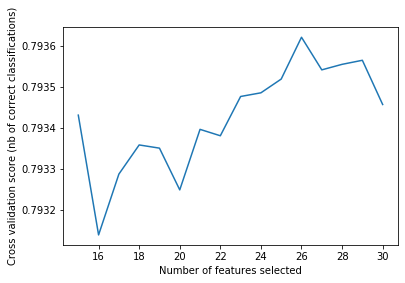

2 finish selector


C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


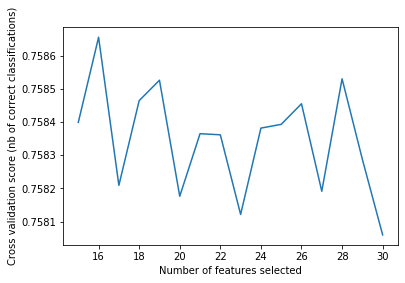

3 finish selector


C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


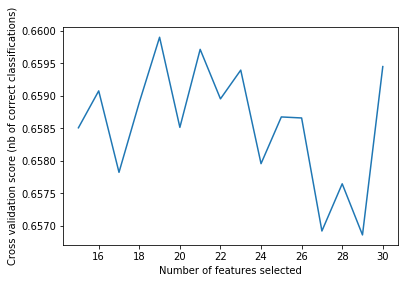

4 finish selector


C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


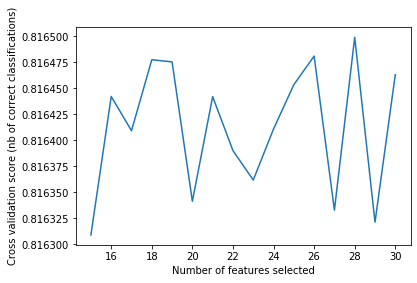

In [54]:
norm_feature_groupby = norm_feature_1.groupby('classification')
for classification, norm_feature_temp in norm_feature_groupby:
      selector_2 = RFECV(estimator=RandomForestRegressor(min_samples_leaf=100,max_samples=0.4), step=1,cv=5,min_features_to_select=15)
      selector_2.fit(norm_feature_temp.iloc[:,:-2], norm_feature_temp['target'])
      print(f'{classification} finish selector')
      columns_selected = selector_2.get_support()
      columns_selected_list = list(columns_selected)
      list_chose = []
      for i,bools in enumerate(columns_selected_list):
            if bools == 'True':
                  list_chose.append(norm_feature_temp.iloc[:,:-2].columns[i])
      norm_feature_2 = norm_feature_temp[list_chose]
      norm_feature_2['target'] = norm_feature_temp['target']
      norm_feature_2.to_csv(f'D:/Kaggle/model/norm_feature_{classification}.csv')
      # Plot number of features VS. cross-validation scores
      plt.figure()
      plt.xlabel("Number of features selected")
      plt.ylabel("Cross validation score (nb of correct classifications)")
      plt.plot(range(15,
                  len(selector_2.grid_scores_) + 15),
            selector_2.grid_scores_)
      plt.show()

In [52]:
a = ['False' for i in range(31)]
a.append('True')
b = []
for i,j in enumerate(a):
    if j == 'True':
        b.append(norm_feature_1.columns[i])
b

['classification']